%The aim of this notebook is to develop a least squares model in tensorflow using a custom linear layer (i.e. not using layers.keras)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.74623114], dtype=float32)>


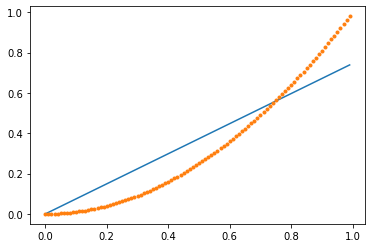

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 

#generating a function to fit a linear model to
dx = 0.01
xx = np.arange(0,1,dx)
N = xx.shape[0]
xx = xx.reshape((N,1))
yy = xx**2


#parameters for our model
model_params = tf.Module()
model_params.weights = tf.Variable([1.],trainable = True)

#defining which optimizer and which measure of error
loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate = 10)

#printing initial model weights
print(model_params.weights)

for i in range(0,1000):
    with tf.GradientTape() as tape:
        #outcome predicted by our model
        prediction = xx*model_params.weights
        loss = loss_object(yy, prediction)
    gradients = tape.gradient(loss,model_params.trainable_variables)
    optimizer.apply_gradients(zip(gradients,model_params.trainable_variables))
print(model_params.weights)

plt.plot(xx,prediction.numpy())
plt.plot(xx,yy,'.')